# Data Science And Business Analysis Internship

# Name:  Lakshmi Sahithi V

# Task 3:Exploratory Data Analysis (Level:Beginner)

## Import Statements

In [16]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Fetching the Data

In [17]:
store_data=pd.read_csv('SampleSuperstore.csv')
print("data imported successfully")

data imported successfully


In [18]:
store_data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## Displaying 10 rows

In [19]:
store_data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [20]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Data Cleaning

In [21]:
store_data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [22]:
store_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

##### Eliminating Postal Code as it is not required 

In [23]:
store_data=store_data.drop('Postal Code',axis=1)

In [24]:
store_data.shape

(9994, 12)

In [25]:
store_data.duplicated().sum()

50

In [26]:
store_data=store_data.drop_duplicates()

In [27]:
store_data.shape

(9944, 12)

## Data visualisation

### 1. Count of ship mode,category,region,quantity and segment  

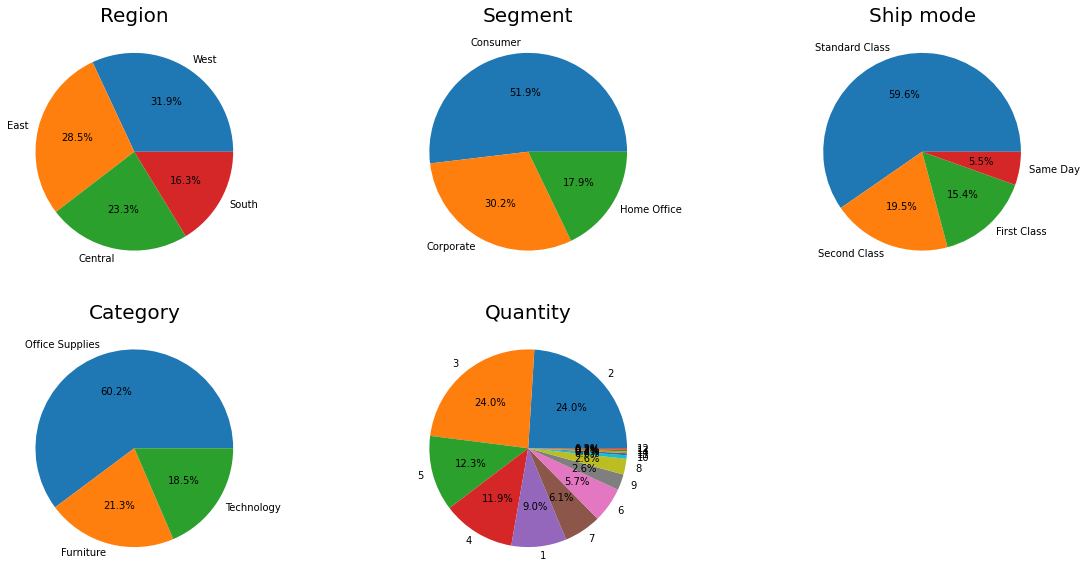

In [136]:
categorical_features = ['Region','Segment','Ship Mode','Category','Quantity']

i = 1

plt.figure(figsize=[20,10])

for feature in categorical_features:
    
    x = store_data[feature].value_counts()
    
    labels = store_data[feature].value_counts().index
    
    plt.subplot(2,3,i)
    
    plt.pie(x=x, labels=labels, autopct='%1.1f%%')
    
    plt.title(feature.capitalize(),fontsize=20,fontweight=2)
    
    i += 1


plt.show()

#### This is number of deals based on region,Segment,ship mode and category

### count of sales based on Sub-category

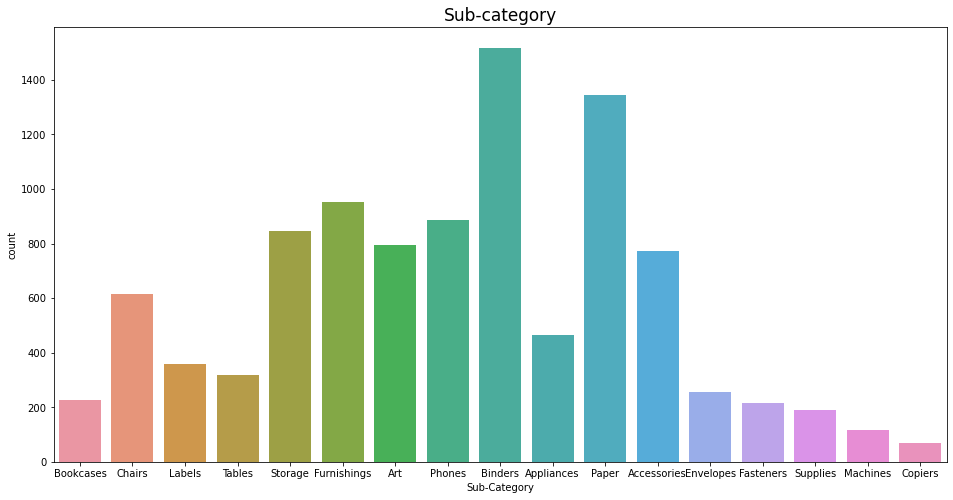

In [29]:
plt.figure(figsize=[16,8])

sns.countplot( x='Sub-Category',y=None,hue=None,data=store_data)
plt.title('Sub-category',fontsize=17)


plt.show()

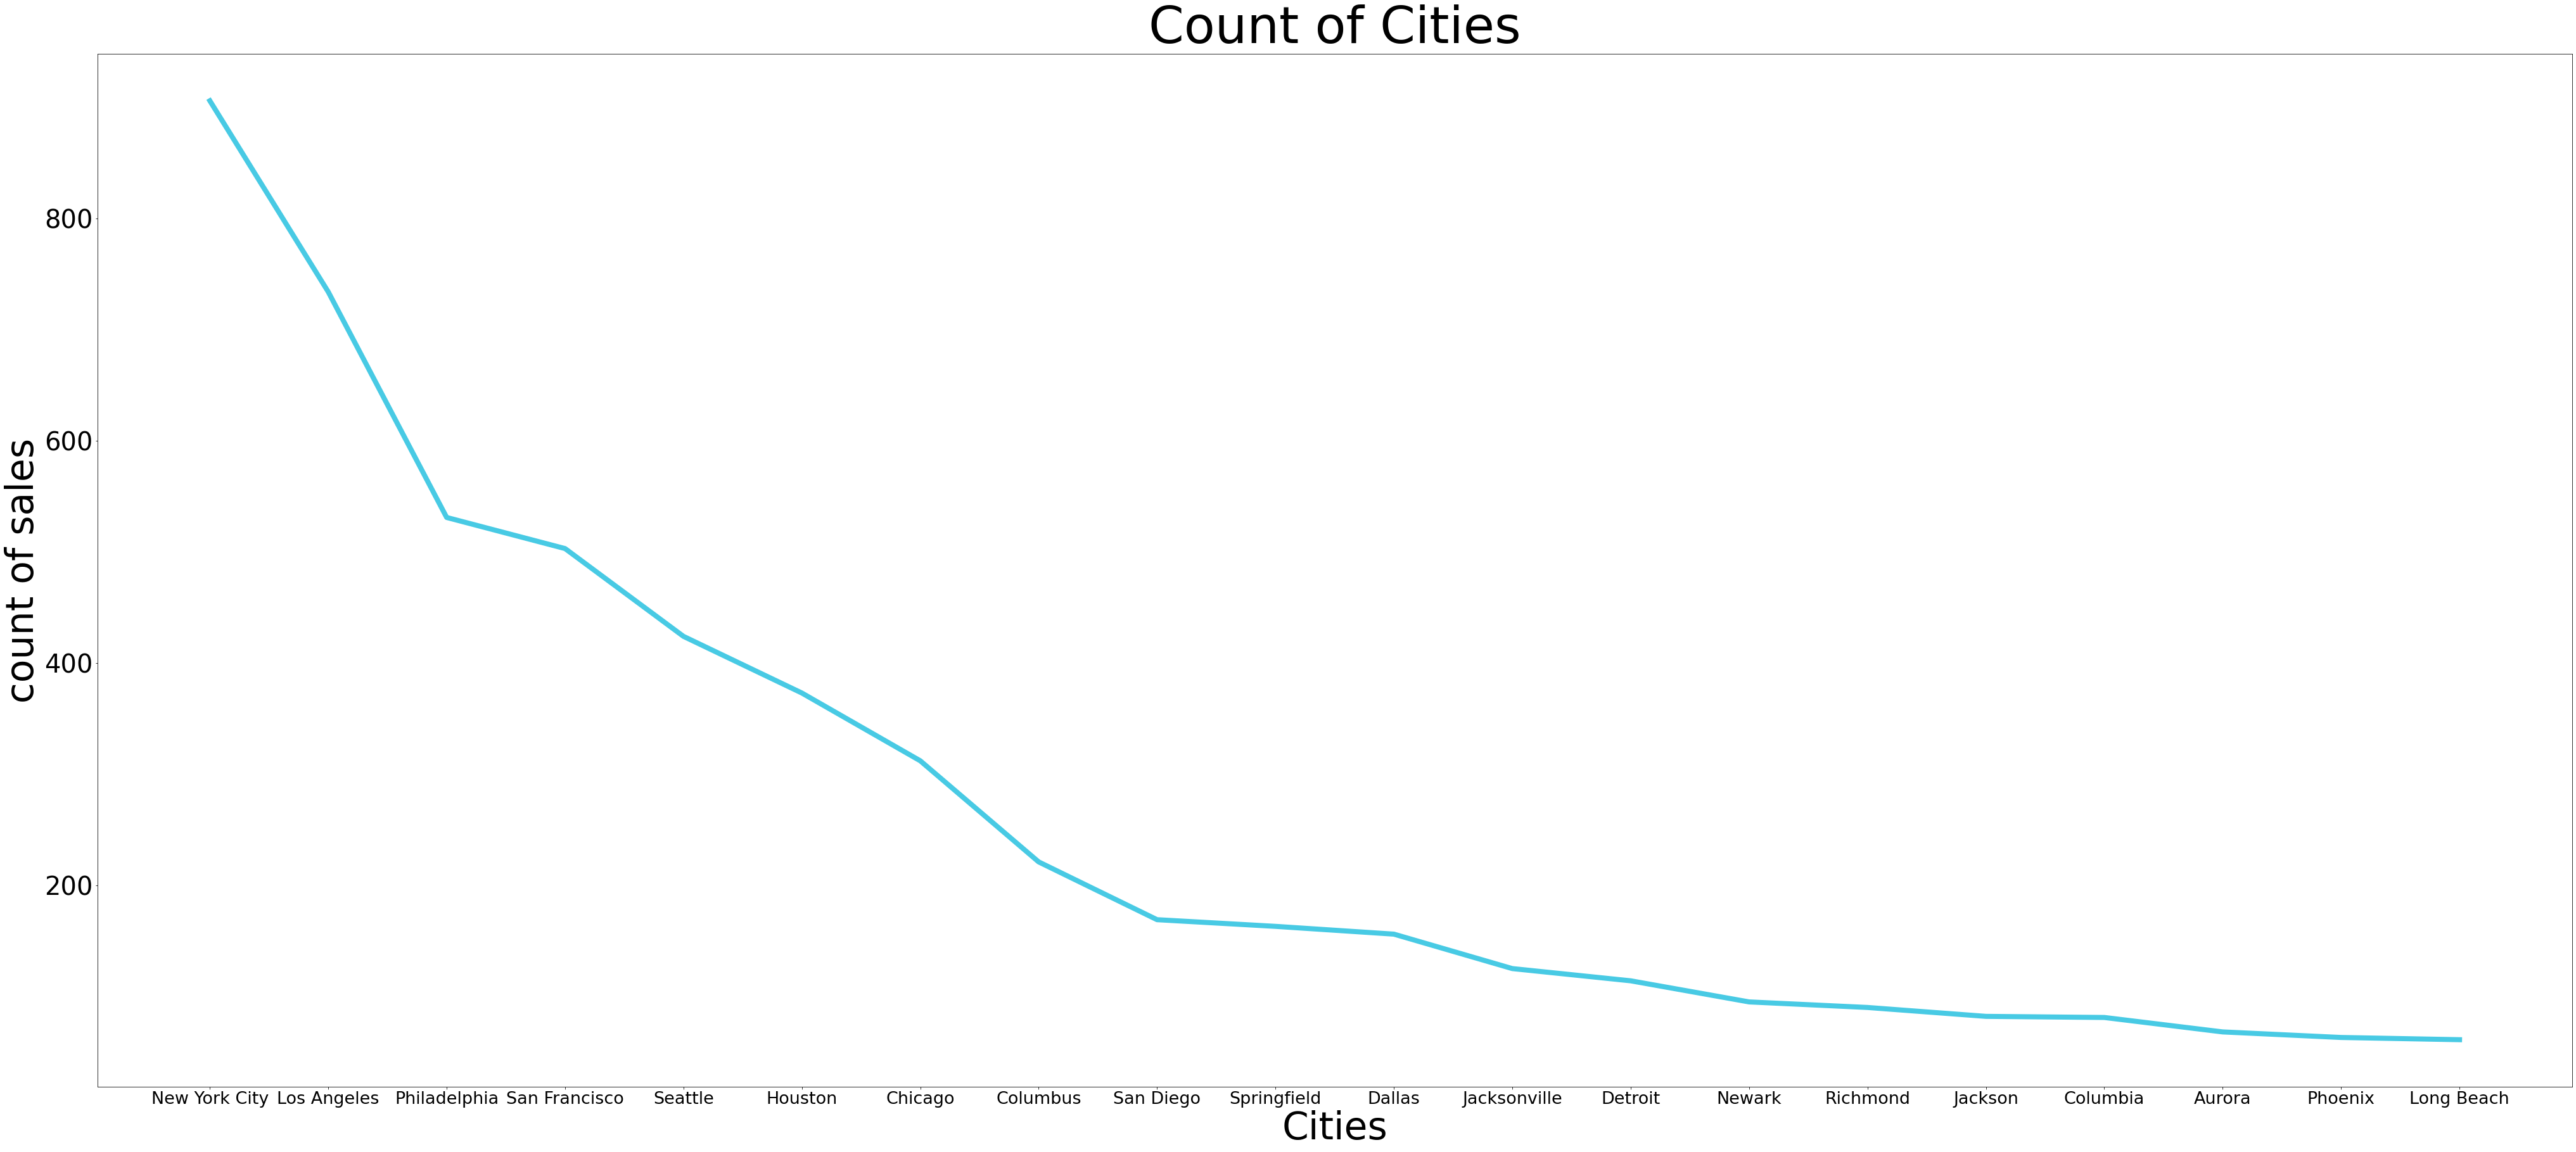

In [45]:
plt.figure(figsize=[70,30])
dat=store_data['City'].value_counts()

plt.plot(dat.head(20),color='#48cae4',linewidth=8)

# increasing the font size of labels 
plt.xticks(fontsize=27)
plt.yticks(fontsize=40)

plt.title("Count of Cities",fontsize=80)
plt.xlabel("Cities",fontsize=60)
plt.ylabel("count of sales",fontsize=60)

plt.show()

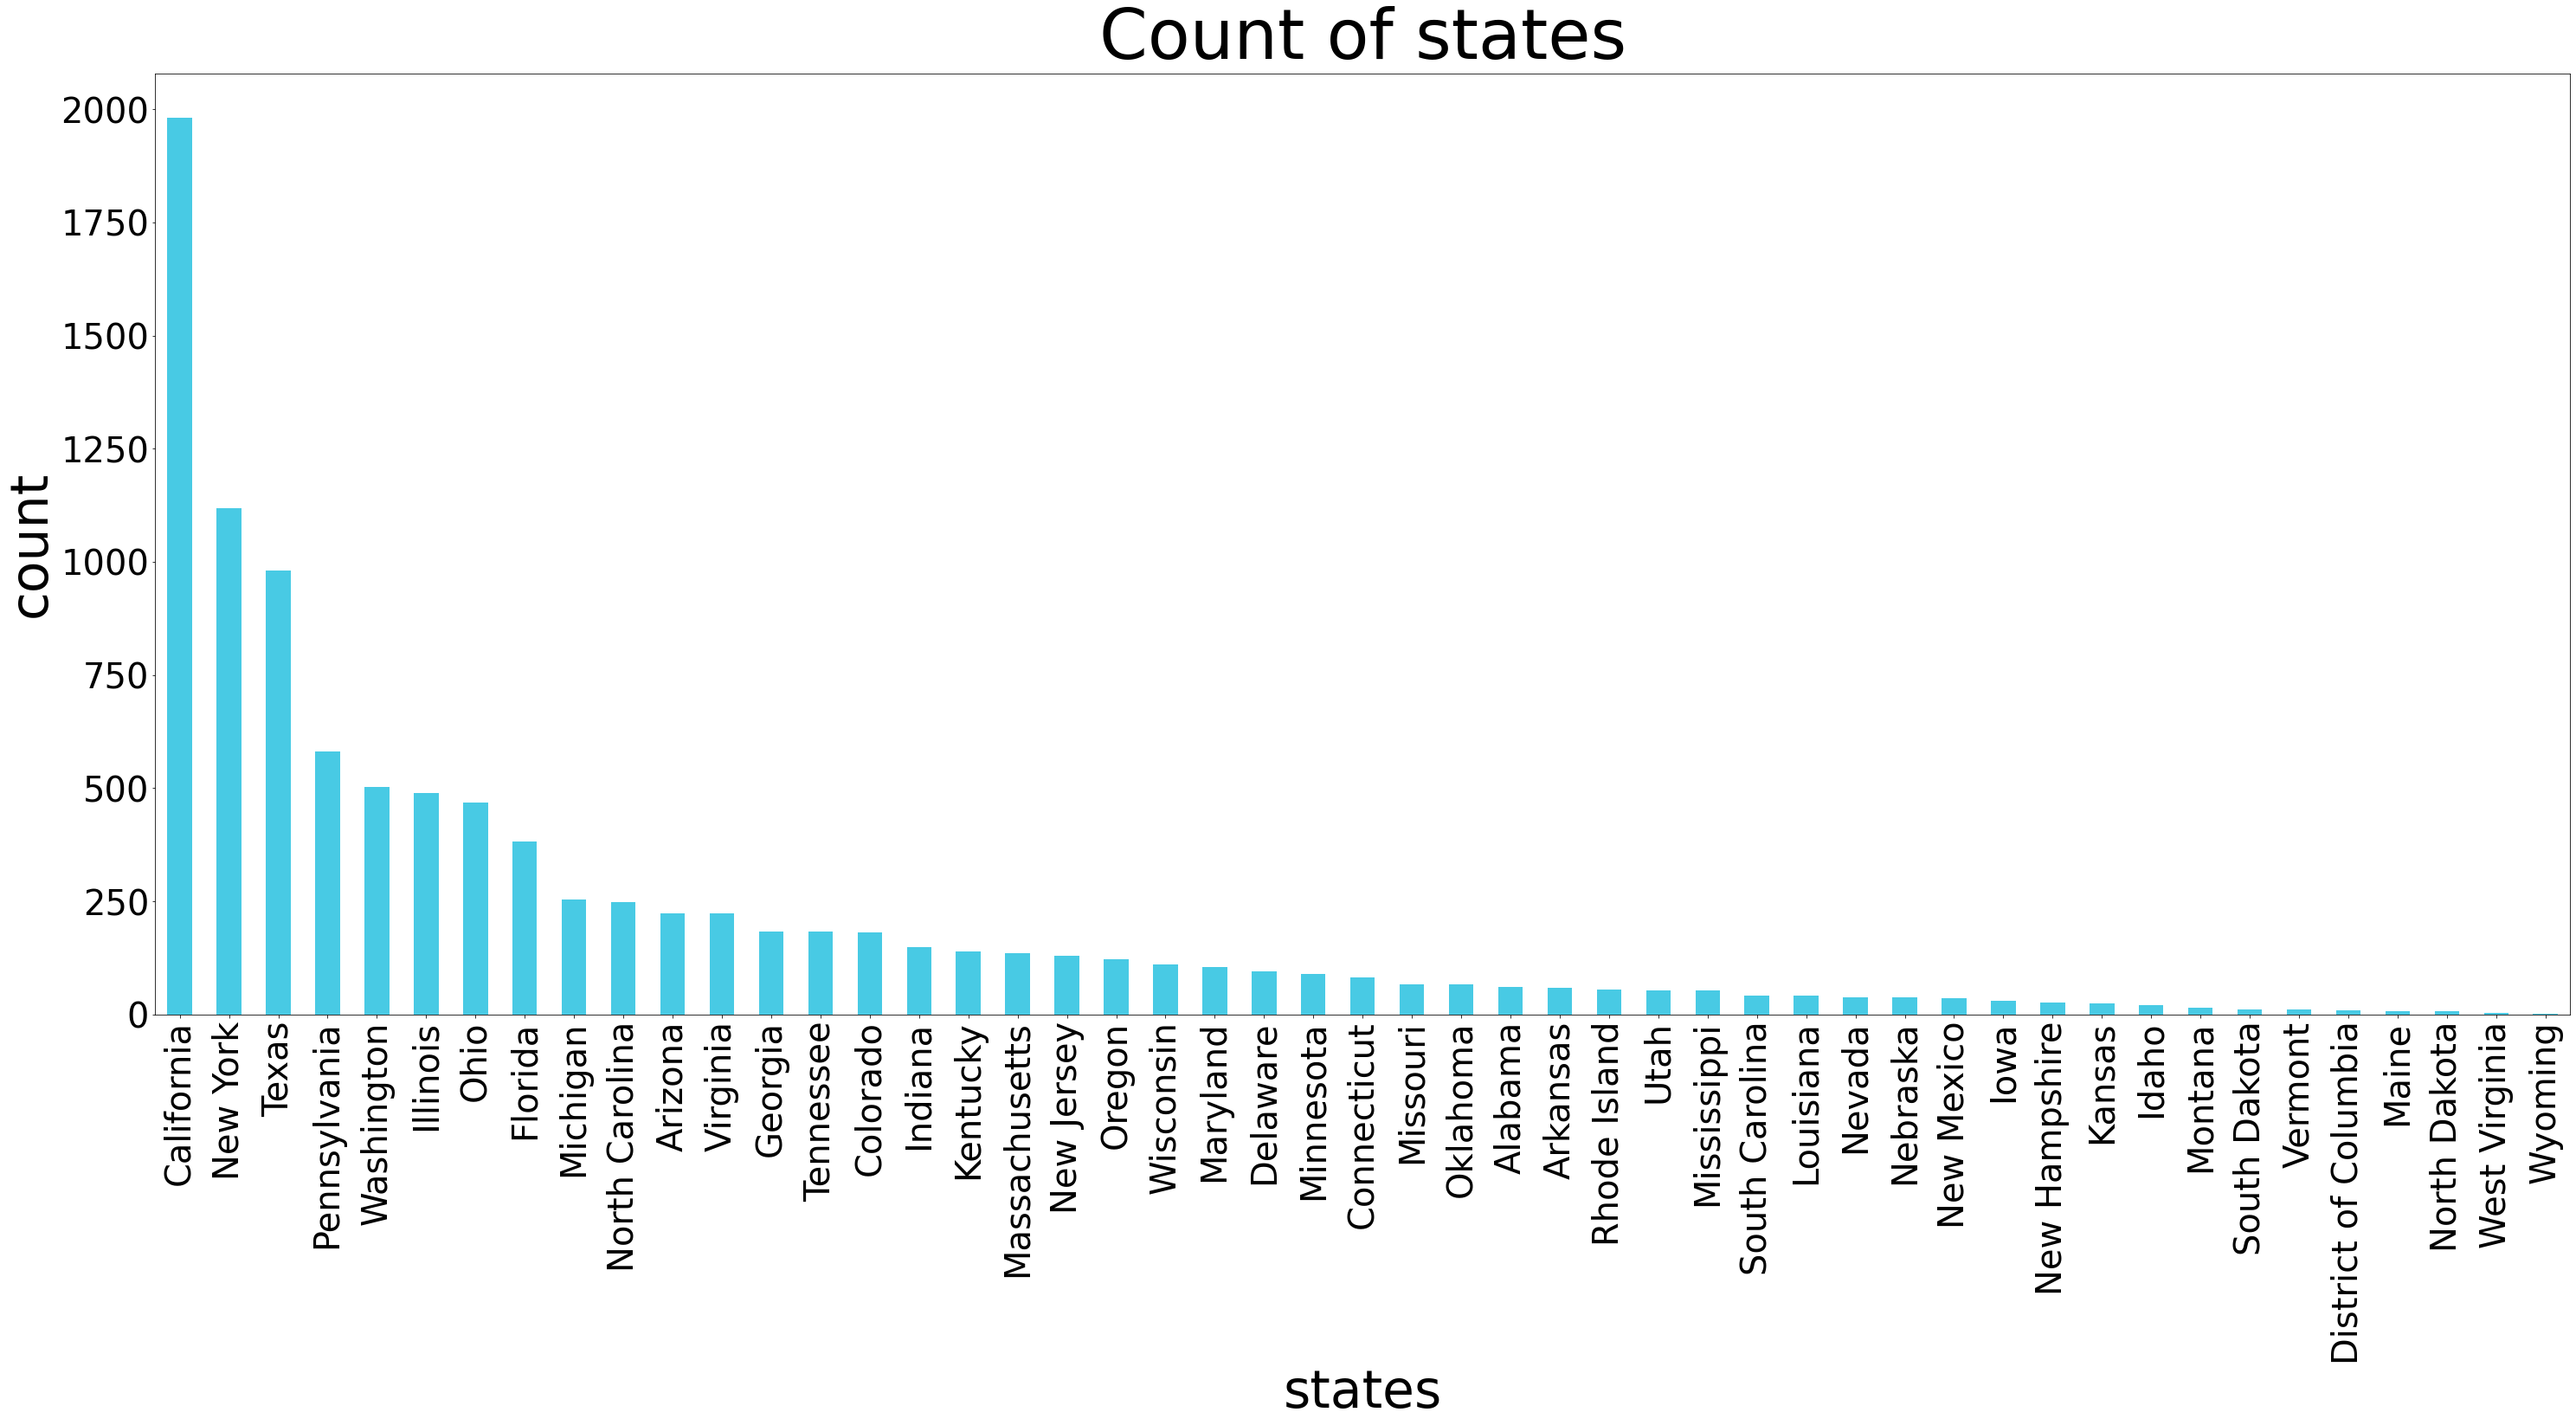

In [58]:
plt.figure(figsize=[50,20])
data=store_data['State'].value_counts()

data.plot(color='#48cae4',kind='bar')

# increasing the font size of labels 
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.title("Count of states",fontsize=80)
plt.xlabel("states",fontsize=60)
plt.ylabel("count",fontsize=60)

plt.show()

#### From this graph we can tell that the number of dealings of California is high whereas West virginia and Wyoming have less number of dealings 

### Finding the correlation between the variables

##### Masking the duplicate values

In [30]:

mask=np.zeros_like(store_data.corr())
triangle_corr=np.triu_indices_from(store_data.corr())
mask[triangle_corr]=True


##### Plotting the heatmap

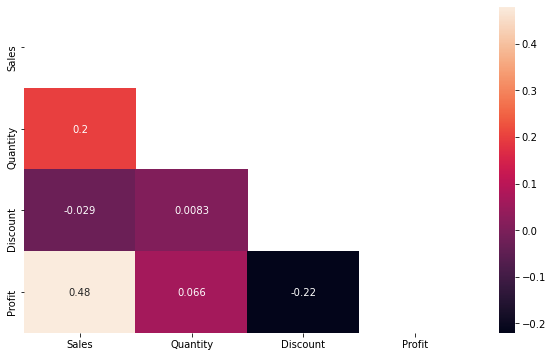

In [31]:
plt.figure(figsize=[10,6])
sns.heatmap(store_data.corr(),annot=True,mask=mask)
plt.show()

### From above heatmap it is clear that quantity is postively related with all the parameters whereas discount is negatively related to profit and sales

## Relational plot between profit and sales based on quantity

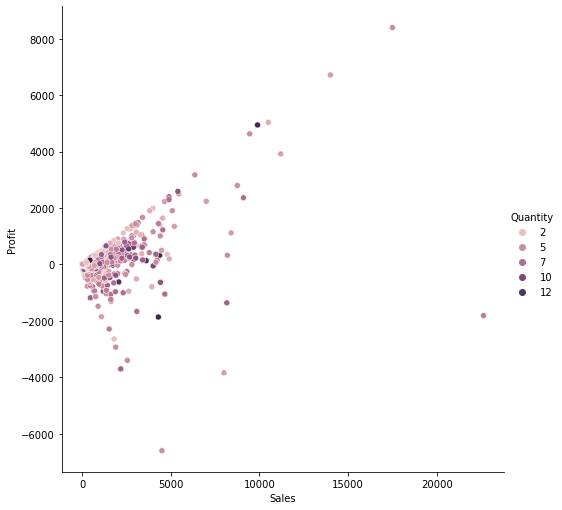

In [32]:
sns.relplot(x='Sales',y='Profit',data=store_data,hue='Quantity',height=7)
plt.show()

## Relational plot between profit and sales based on ship mode

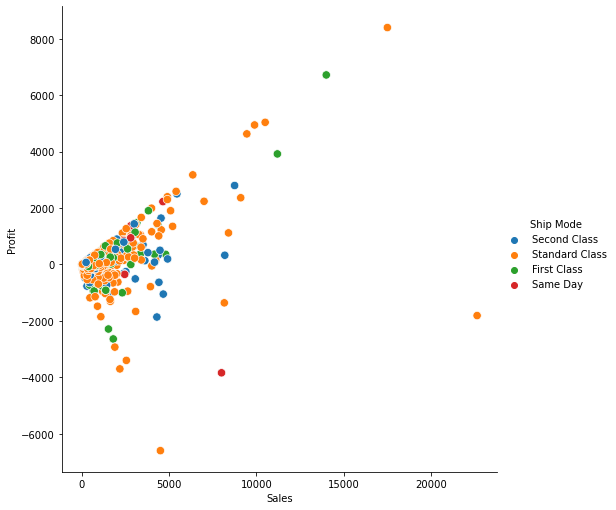

In [33]:
sns.relplot(x='Sales',y='Profit',data=store_data,hue='Ship Mode',height=7,s=70)
plt.show()

## Relational plot between profit and sales based on category

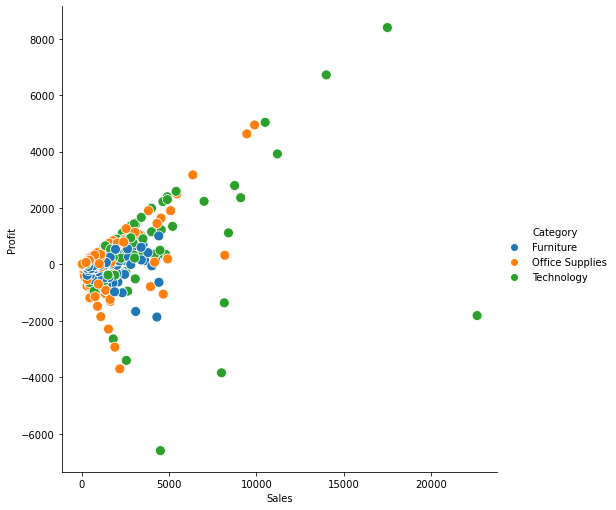

In [34]:
sns.relplot(x='Sales',y='Profit',data=store_data,hue='Category',height=7,s=100)
plt.show()

## Distribution of various parameters 

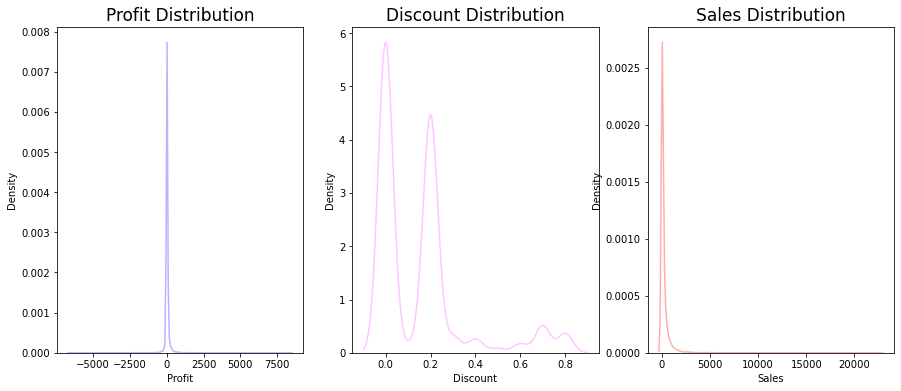

In [35]:
plt.figure(figsize=[15,6])


plt.subplot(1,3,1)
sns.kdeplot(store_data['Profit'],color='#bdb2ff')
plt.title('Profit Distribution',fontsize=17)


plt.subplot(1,3,2)
sns.kdeplot(store_data['Discount'],color='#ffc6ff')
plt.title('Discount Distribution',fontsize=17)


plt.subplot(1,3,3)
sns.kdeplot(store_data['Sales'],color='#ffadad')
plt.title('Sales Distribution',fontsize=17)


plt.show()

##### Here the profit is normal skewed while the sales is right skewed

## 1.QUANTITY BASED ANALYSIS 

<Figure size 1152x576 with 0 Axes>

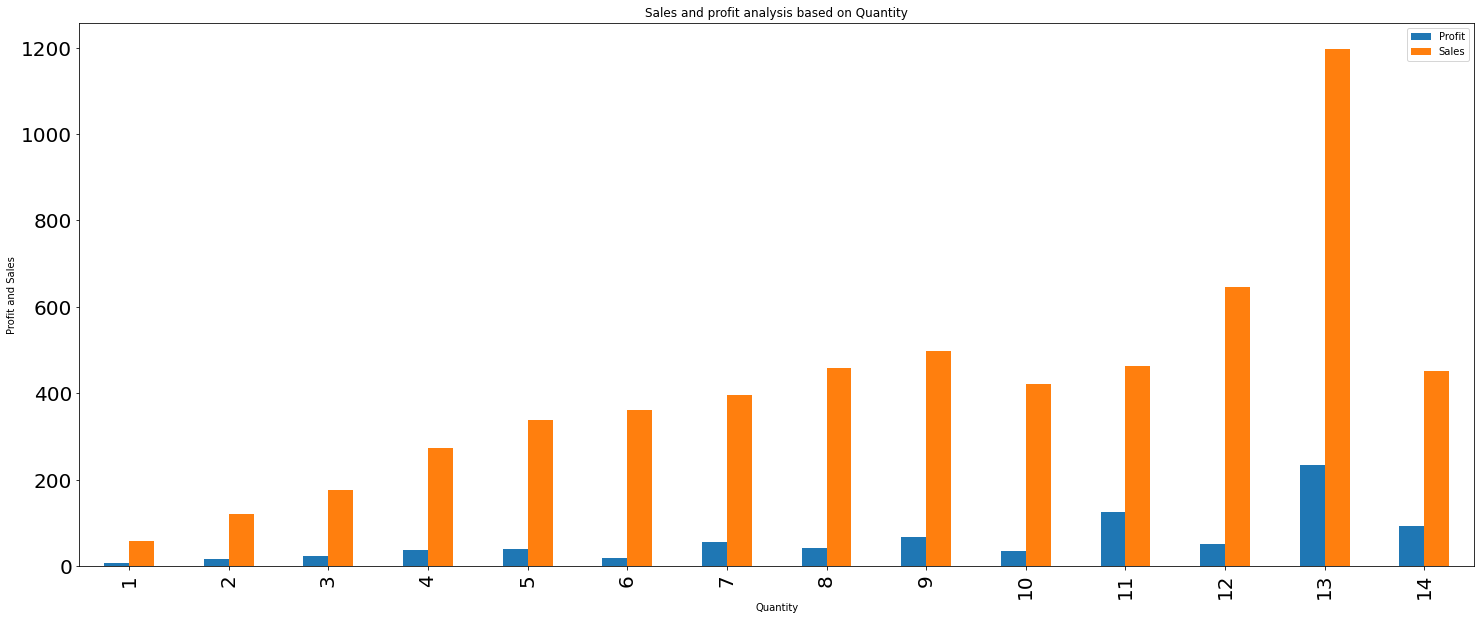

In [36]:
quan=store_data.groupby(['Quantity'])[['Profit','Sales','Discount']].mean()
plt.figure(figsize=[16,8])

quan[['Profit','Sales']].plot(kind='bar',figsize=[25,10],xlabel='Quantity',ylabel='Profit and Sales'
                              ,title='Sales and profit analysis based on Quantity',fontsize=20)

plt.show()

###### This shows that 13 has highest returns as well as high profits 

## Discount analysis based on quantity

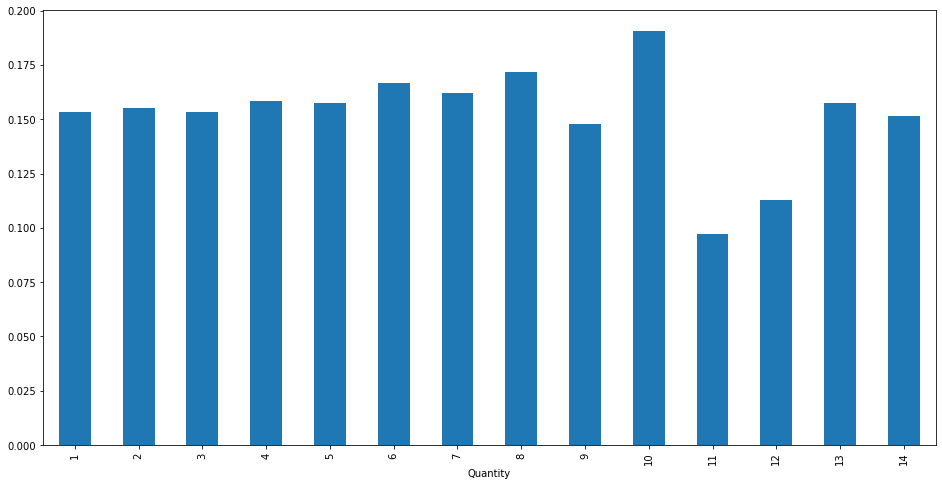

In [37]:
plt.figure(figsize=[16,8])
quan['Discount'].plot(kind='bar')
plt.show()

###### This graph shows that 10 has highest discount 

## 2.Category Wise Analysis

				Analysis of different parameters based on category


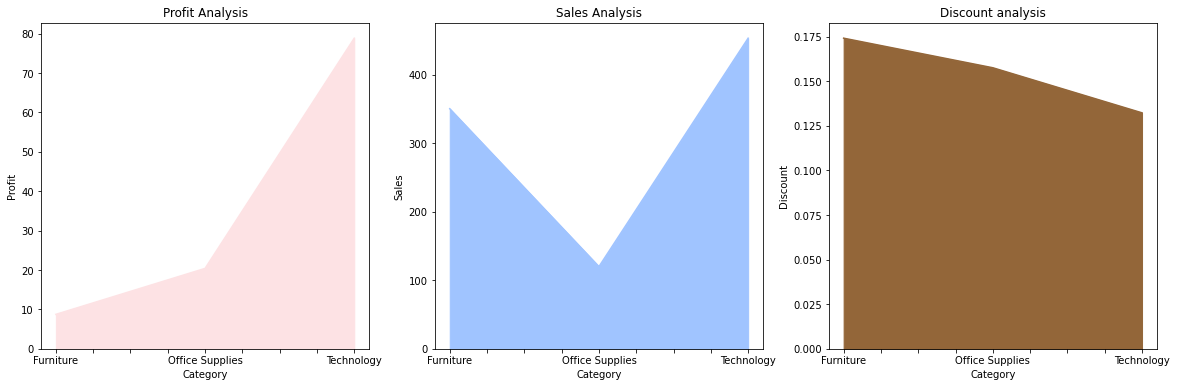

In [38]:

category=store_data.groupby(['Category'])[['Profit','Discount','Sales']].mean()

print('\t\t\t\tAnalysis of different parameters based on category')


plt.subplot(1,3,1)
category['Profit'].plot(kind='area',figsize=[20,6],color='#fde2e4',title='Profit Analysis',ylabel='Profit')


plt.subplot(1,3,2)
category['Sales'].plot(kind='area',figsize=[20,6],color='#a0c4ff',title='Sales Analysis',ylabel='Sales')


plt.subplot(1,3,3)
category['Discount'].plot(kind='area',figsize=[20,6],color='#936639',title='Discount analysis',ylabel='Discount')


plt.show()

###### From this Graph we can say that:
###### 1.Technology has higher returns and profits while it has less discounts
###### 2.Furniture has low profits but satisfactory sales as the discount given is high

## 3.Sub-Category wise analysis

				Analysis of different parameters based on Sub-category


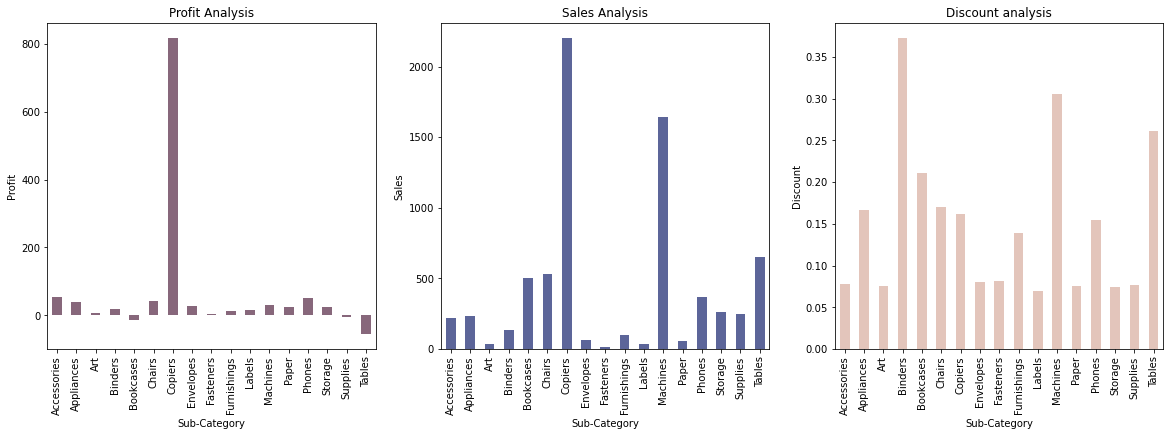

In [130]:

sub=store_data.groupby(['Sub-Category'])[['Profit','Discount','Sales']].mean()

print('\t\t\t\tAnalysis of different parameters based on Sub-category')


plt.subplot(1,3,1)
sub['Profit'].plot(kind='bar',figsize=[20,6],color='#87677B',title='Profit Analysis',ylabel='Profit')


plt.subplot(1,3,2)
sub['Sales'].plot(kind='bar',figsize=[20,6],color='#5C6599',title='Sales Analysis',ylabel='Sales')


plt.subplot(1,3,3)
sub['Discount'].plot(kind='bar',figsize=[20,6],color='#E3C5BB',title='Discount analysis',ylabel='Discount')


plt.show()

###### This graph shows tables and bookcases has acceptable sales but negative profits 
###### copiers has highest returns as well as high profits 

# 

## 4.SHIP MODE WISE ANALYSIS OF PROFITS SALES AND DISCOUNT

				Analysis of different parameters based on Ship Mode


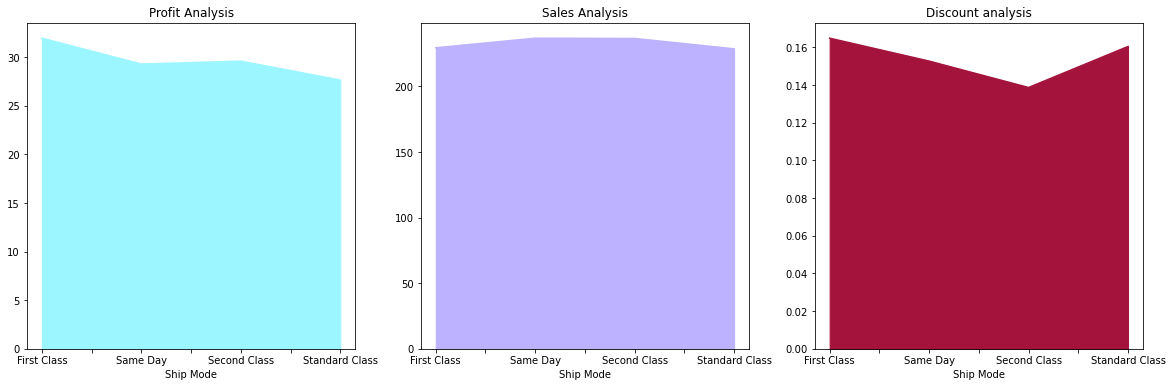

In [66]:

ship=store_data.groupby(['Ship Mode'])[['Profit','Discount','Sales']].mean()

print('\t\t\t\tAnalysis of different parameters based on Ship Mode')


plt.subplot(1,3,1)
ship['Profit'].plot(kind='area',figsize=[20,6],title='Profit Analysis',color='#9bf6ff')


plt.subplot(1,3,2)
ship['Sales'].plot(kind='area',figsize=[20,6],title='Sales Analysis',color='#bdb2ff')


plt.subplot(1,3,3)
ship['Discount'].plot(kind='area',figsize=[20,6],title='Discount analysis',color='#a4133c')


plt.show()

######  All the parameters are comparable however first class has high profits and discount.

## 5.REGION WISE ANALYSIS

				Analysis of different parameters based on Region


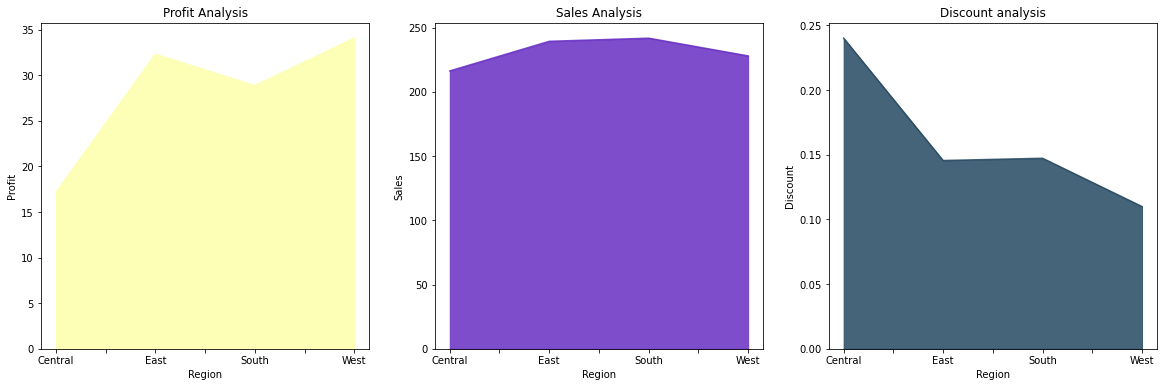

In [40]:
region=store_data.groupby(['Region'])[['Profit','Discount','Sales']].mean()


print('\t\t\t\tAnalysis of different parameters based on Region')


plt.subplot(1,3,1)
region['Profit'].plot(kind='area',figsize=[20,6],color='#fdffb6',title='Profit Analysis',ylabel='Profit')


plt.subplot(1,3,2)
region['Sales'].plot(kind='area',figsize=[20,6],color='#6930c3'
                     ,alpha=0.86,title='Sales Analysis',ylabel='Sales')


plt.subplot(1,3,3)
region['Discount'].plot(kind='area',figsize=[20,6],color='#284b63'
                        ,alpha=0.86,title='Discount analysis',ylabel='Discount')


plt.show()

###### From the graph we can say that
###### 1. West region has highest profits whereas Central region has least profits
###### 2. East and South has appreciable returns whereas Central and West has acceptable returns
###### 3.Central has highest discount whereas West has less discounts

## 6.Segment wise analysis

				Analysis of different parameters based on Segment


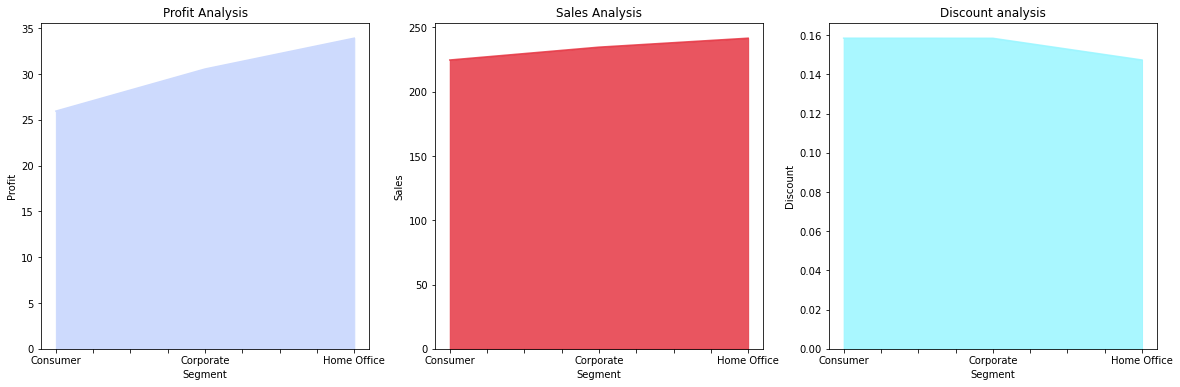

In [139]:
seg=store_data.groupby(['Segment'])[['Profit','Discount','Sales']].mean()


print('\t\t\t\tAnalysis of different parameters based on Segment')


plt.subplot(1,3,1)
seg['Profit'].plot(kind='area',figsize=[20,6],color='#cddafd',title='Profit Analysis',ylabel='Profit')


plt.subplot(1,3,2)
seg['Sales'].plot(kind='area',figsize=[20,6],color='#e63946'
                     ,alpha=0.86,title='Sales Analysis',ylabel='Sales')


plt.subplot(1,3,3)
seg['Discount'].plot(kind='area',figsize=[20,6],color='#9bf6ff'
                        ,alpha=0.86,title='Discount analysis',ylabel='Discount')


plt.show()

###### Consumer has good profits as well as good sales


## 

# 7.State wise Analysis

### State wise Profit analysis 

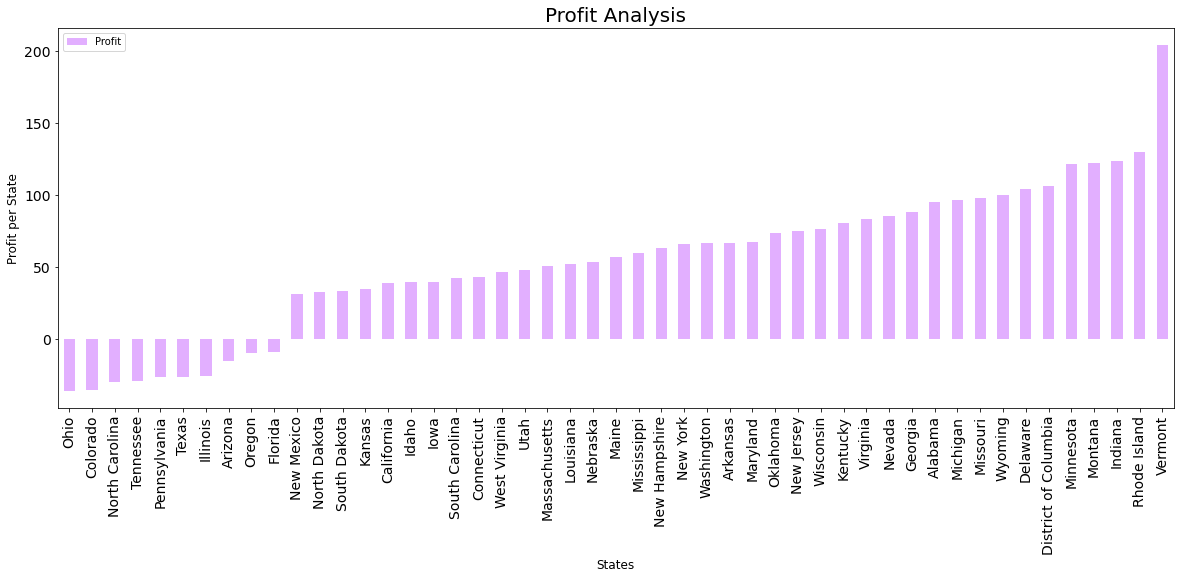

In [42]:
state= store_data.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()

profit=state.sort_values('Profit')

profit[['Profit']].plot(kind = 'bar', figsize = (20,7), color='#e2afff')

plt.title('Profit Analysis', fontsize = 20)

plt.ylabel('Profit per State',fontsize=12)
plt.xlabel('States',fontsize=12)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

###### The graph depicts that Ohio has the least profit and Vermont has the highest profit

## State wise Sales analysis

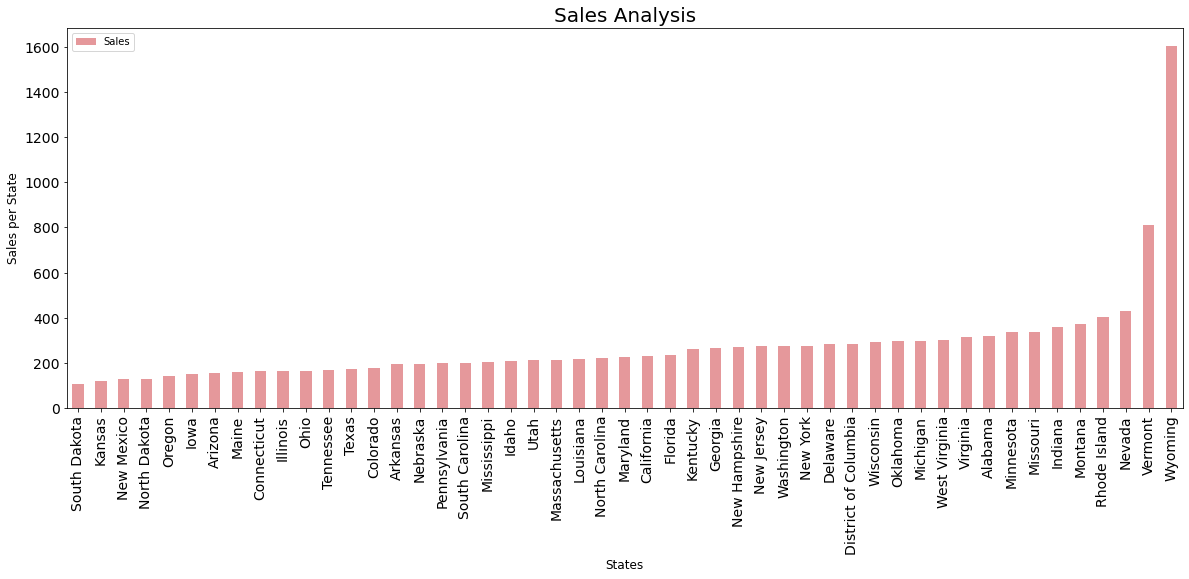

In [43]:
sale=state.sort_values('Sales')

sale[['Sales']].plot(kind = 'bar', figsize = (20,7), color='#e5989b')

plt.title('Sales Analysis', fontsize = 20)

plt.ylabel('Sales per State',fontsize=12)
plt.xlabel('States',fontsize=12)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

###### The graph depicts that South Dakota has the least sales and Wyoming has maximum Sales

## State wise Discount analysis 

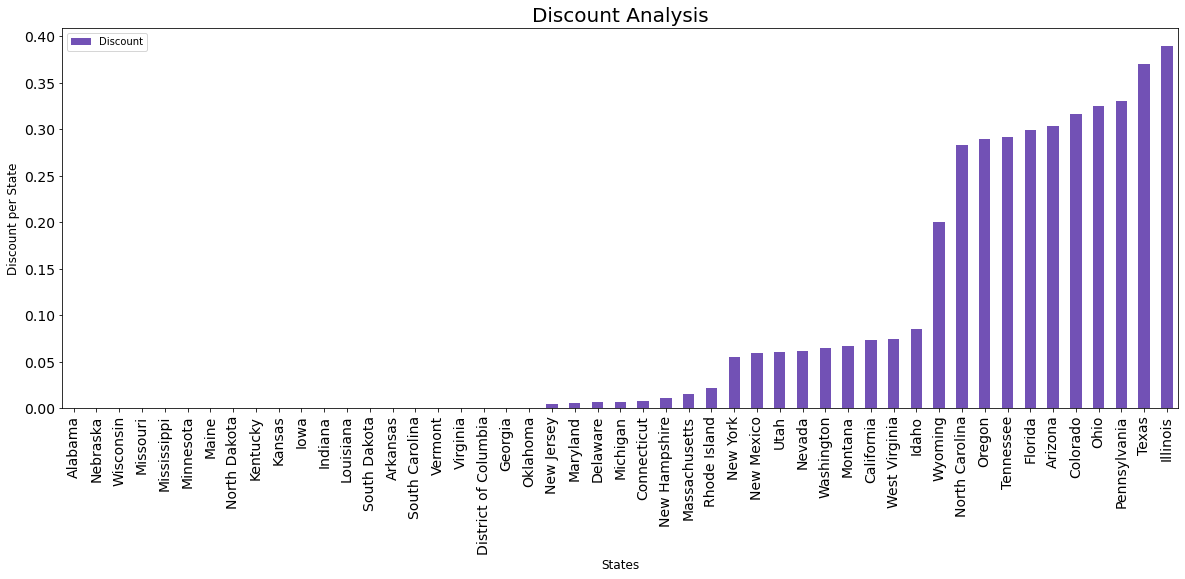

In [44]:
dis=state.sort_values('Discount')

dis[['Discount']].plot(kind = 'bar', figsize = (20,7), color='#7251b5')

plt.title('Discount Analysis', fontsize = 20)

plt.ylabel('Discount per State',fontsize=12)
plt.xlabel('States',fontsize=12)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

###### It is observed that states like Alabarma ,Nebraska,Wisconsin... have no discount whereas Illinois have high discounts

# 8.City wise Analysis

## Profit analysis for different cities

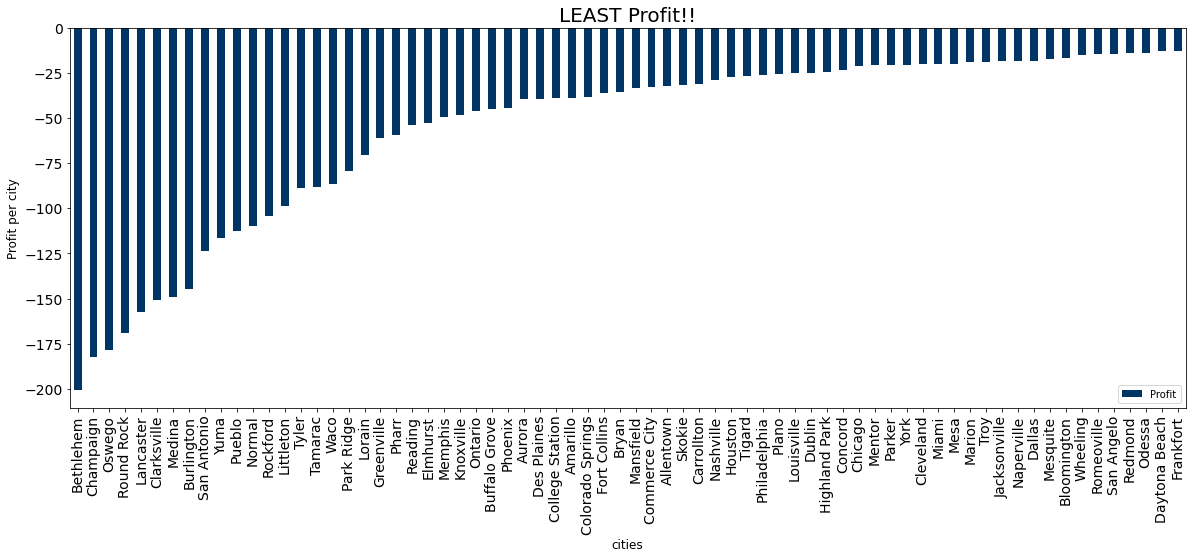

In [46]:
city= store_data.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()

profit_city=city.sort_values('Profit')

profit_city[['Profit']].head(70).plot(kind = 'bar', figsize = (20,7), color='#003566')

plt.title('LEAST Profit!!', fontsize = 20)

plt.ylabel('Profit per city',fontsize=12)
plt.xlabel('cities',fontsize=12)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

###### This is the graph depicting the cities which have least profits where Bethlehem has negative profits(that is losses)

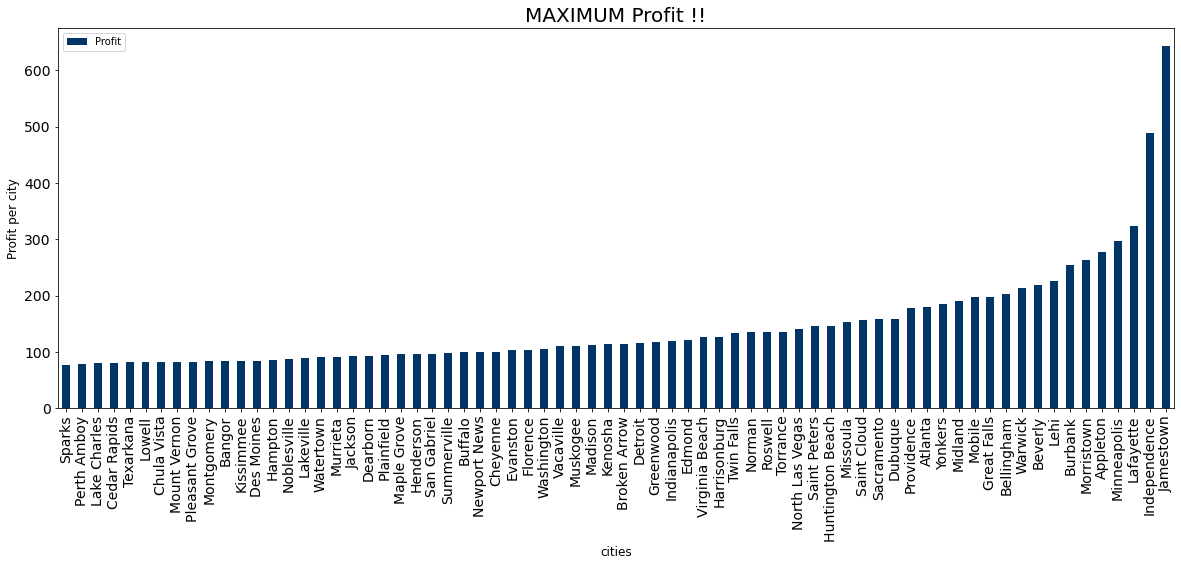

In [47]:
profit_city[['Profit']].tail(70).plot(kind = 'bar', figsize = (20,7), color='#003566')

plt.title('MAXIMUM Profit !!', fontsize = 20)

plt.ylabel('Profit per city',fontsize=12)
plt.xlabel('cities',fontsize=12)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

###### This is the graph depicting highest profits where Jamestown has highest profits

## Sales analysis for different cities

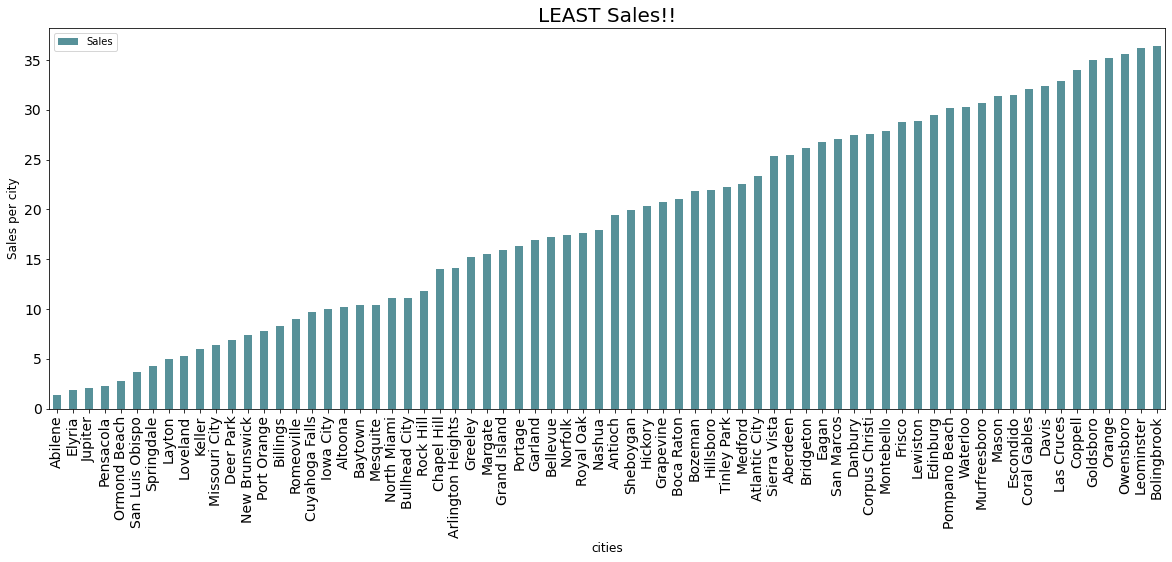

In [48]:
sales_city=city.sort_values('Sales')

sales_city[['Sales']].head(70).plot(kind = 'bar', figsize = (20,7), color='#579199')

plt.title('LEAST Sales!!', fontsize = 20)

plt.ylabel('Sales per city',fontsize=12)
plt.xlabel('cities',fontsize=12)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

###### This is the graph depicting the cities which have Minimum or no sales where Abilene has least returns

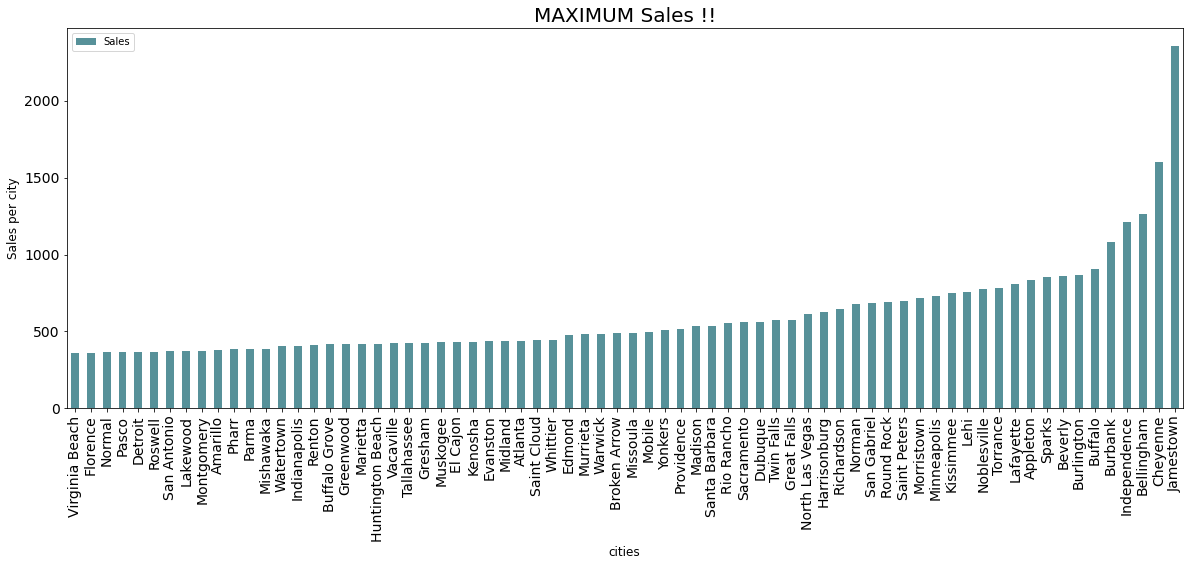

In [49]:
sales_city[['Sales']].tail(70).plot(kind = 'bar', figsize = (20,7), color='#579199')

plt.title('MAXIMUM Sales !!', fontsize = 20)

plt.ylabel('Sales per city',fontsize=12)
plt.xlabel('cities',fontsize=12)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

###### This is the graph depicting the cities which have maximum Sales where Jamestown has highest returns

## Discount analysis for Different cities

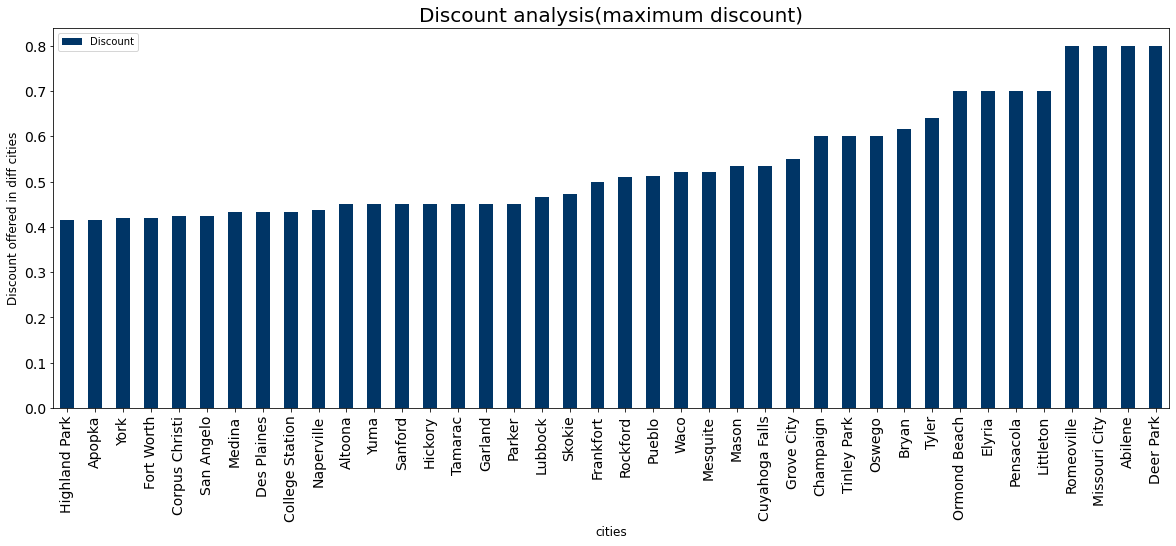

In [50]:
discount=city.sort_values('Discount')
discount[['Discount']].tail(40).plot(kind = 'bar', figsize = (20,7), color='#003566')

plt.title('Discount analysis(maximum discount)', fontsize = 20)

plt.ylabel('Discount offered in diff cities',fontsize=12)
plt.xlabel('cities',fontsize=12)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

###### From this graph we can declare that Deer park provides maximum discount 

In [51]:
discount[['Discount']].head(185)

,Discount
City,
Aberdeen,0.000000
Jamestown,0.000000
Jefferson City,0.000000
Jonesboro,0.000000
Kenner,0.000000
...,...
Eagan,0.000000
Vacaville,0.000000
Dearborn Heights,0.000000


###### In this table it is observed that stores in more than 180 cities dont provide any discount 

## Visualisation of profits,discount and sales

<Figure size 720x432 with 0 Axes>

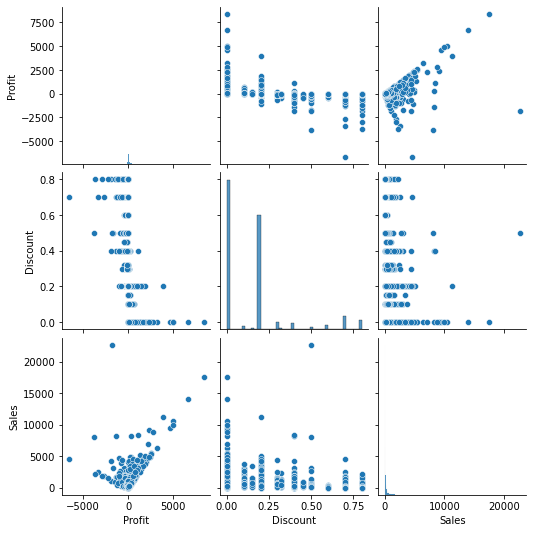

In [52]:
plt.figure(figsize=[10,6])

store_=store_data.iloc[:,[11,10,8]]

sns.pairplot(data=store_)

plt.show()

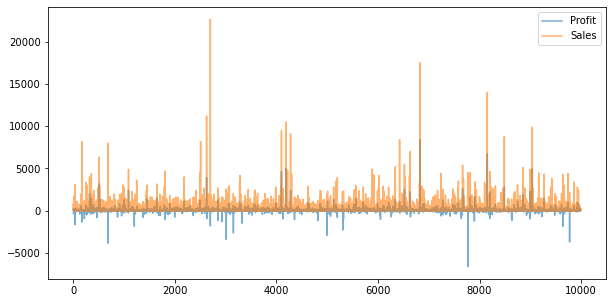

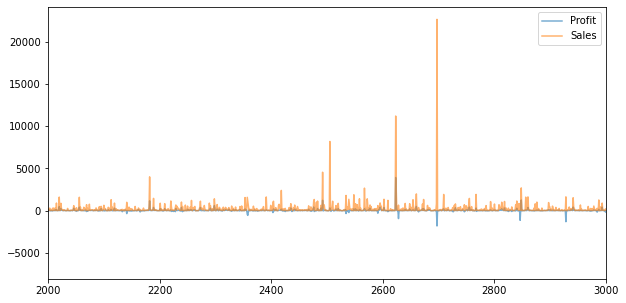

In [112]:
# Plotting sales and profit of stores
store_data[['Profit','Sales']].plot(kind='line',figsize=[10,5],alpha=0.6)
# zoomed version of the same graph 
store_data[['Profit','Sales']].plot(kind='line',figsize=[10,5],xlim=(2000,3000),alpha=0.6)
plt.show()

###### This graph shows that sales are high but profits are comparatively low.

#   

# 

## Conclusion

### 1. Furniture profits have to be examined .Office supply profits needs improvement.
### 2. Central region profits needs a push.
### 3. States like Ohio,North Carolina,Tennessee and Colorado need serious attention as there is no profits and      sales 
### 4. Rhode island,Montana,Indiana,Vermount have appreciable sales as well as profits .Expansion can be done 
### 5. Wyoming has highest sales and profits are pretty good . 
### 6. Many city stores have less returns and needs instant improvement
### 7.There are high returns but profits are not high enough .This aspect has to be examined.


# 

## Thank you..